Python3 supports complex math. Here are some examples.

In [1]:
import cmath
z1 = complex(1, 2) # the number 1 + 2j
z2 = complex(-1, 1) # the complex number -1 + j
(r2, ang2) = cmath.polar(z2)
print(f'z2 in polar coordinates: modulus = {r2}, phase = {ang2}')
z3 = 1/z2 # take 1/z2
print(f'z3 = {z3}')
(r3, ang3) = cmath.polar(z3)
print(f'z3 in polar coordinates: modulus = {r3}, phase = {ang3}')
# Python simply allows you to write complex numbers using
# j as the imaginary root of -1.
z4 = 1.0 - 2.1j
print(z4)

z2 in polar coordinates: modulus = 1.4142135623730951, phase = 2.356194490192345
z3 = (-0.5-0.5j)
z3 in polar coordinates: modulus = 0.7071067811865476, phase = -2.356194490192345
(1-2.1j)


Let's write a function to get us all the roots of unity for a given n. Note that these roots are given by:

$$\omega_n^k = \cos\left( \frac{2 \pi k}{n} \right) + j \sin\left(\frac{2 \pi k}{n} \right)$$

In [2]:
import math
def get_roots_of_unity(n):
    assert n >= 2
    angles = [2.0 * math.pi * k/n for k in range(n)]
    lst = [math.cos(ang) + math.sin(ang)*1j for ang in angles]
    return lst

In [ ]:
print(get_roots_of_unity(2))
print(get_roots_of_unity(3))
print(get_roots_of_unity(4))
print(get_roots_of_unity(5))
print(get_roots_of_unity(6))
print(get_roots_of_unity(12))

[(1+0j), (-1+1.2246467991473532e-16j)]
[(1+0j), (-0.4999999999999998+0.8660254037844387j), (-0.5000000000000004-0.8660254037844384j)]
[(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]
[(1+0j), (0.30901699437494745+0.9510565162951535j), (-0.8090169943749473+0.5877852522924732j), (-0.8090169943749476-0.587785252292473j), (0.30901699437494723-0.9510565162951536j)]
[(1+0j), (0.5000000000000001+0.8660254037844386j), (-0.4999999999999998+0.8660254037844387j), (-1+1.2246467991473532e-16j), (-0.5000000000000004-0.8660254037844384j), (0.5000000000000001-0.8660254037844386j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.123233995736766e-17+1j), (-0.4999999999999998+0.8660254037844387j), (-0.8660254037844387+0.49999999999999994j), (-1+1.2246467991473532e-16j), (-0.8660254037844388-0.4999999999999997j), (-0.5000000000000004-0.8660254037844384j), (-1.8369701987210297e-16-1j), (0.5000000000000001-0.866

Given a sequence of data points
$$ a_0, a_1, \ldots, a_{n-1},$$
It's discrete Fourier transform is a sequence of $n$ complex numbers:
$$ A_0, \ldots, A_{n-1},$$
wherein
$$A_k = a_0 + a_1 \omega_n^k + a_2 (\omega_n^k)^2 + \cdots + a_{n-1} (\omega_n^k)^{n-1}$$
where $\omega_n= \cos\left(\frac{ 2\pi}{n}\right) + j \sin\left(\frac{ 2\pi}{n}\right)$.

A simple way to remember this is to think of the polynomial
$$a(z) = a_0 + a_1 z + a_2 z^2 + \cdots + a_{n-1}z^{n-1} $$
Then, $A_k$ is simply the polynomial $a(z)$ evaluated at $z= \omega_n^k$, i.e,
$A_k = a(\omega_n^{k})$.


In [3]:
def compute_fourier_coeffs_naive(seq):
    # Let us just do a brute force computation
    n = len(seq)
    fft_seq = []
    w = 1.0
    # This is the generator of all the nth roots of unity.
    wn = math.cos(2.0 * math.pi /n) + math.sin(2.0 * math.pi/n)*1j
    # Compute each coefficient
    for j in range(n):
        Aj = 0
        wj = 1.0
        # Compute the summation
        for k in range(n):
            Aj = Aj + wj*seq[k]
            wj = wj * w
        fft_seq.append(Aj)
        w = w * wn
    #The overall procedure takes n^2 time.
    return fft_seq


In [ ]:
seq = [1.0, -1.0, 1.0, 1.0, 1.0, -1.0,1.0, 1.0]
print(compute_fourier_coeffs_naive(seq))

[4.0, (-2.220446049250313e-16-2.220446049250313e-16j), (-3.552713678800501e-15-3.999999999999999j), (9.992007221626409e-16+2.220446049250313e-15j), (4-2.220446049250313e-15j), (-1.4432899320127035e-15+3.774758283725532e-15j), (7.105427357601002e-15+4.000000000000002j), (2.220446049250313e-15-8.881784197001252e-16j)]


Let's compute the same using the divide and conquer algorithm for fast Fourier transform (FFT) presented in the lecture.

In [4]:
def fft(seq):
    # this code only works when the length of sequence is a power of two.
    # for arbitrary sequence lengths, we need a more carefully designed divide and conquer
    # scheme such as the so called "FFTW" (fast fourier transform in the West) scheme
    # proposed by Cooley and Tukey.

    # base case when seq has single element
    if len(seq) == 1:
        return seq
    else:
        n = len(seq)
        assert n%2 == 0
        # Split the sequence into odd add even elements
        seq_even = [seq[2*j] for j in range(n//2)] # even
        seq_odd = [seq[2*j+1] for j in range(n//2)] # odd
        s1 = fft(seq_even) # recursively call fft
        s2 = fft(seq_odd) # recursively call fft
        # prepare the result array
        fft_ret = [0]*n
        w = 1.0
        wn = (math.cos(2.0 * math.pi /n) + math.sin(2.0 * math.pi/n)*1j)
        # combine the fft for odd and even into
        # fft for the original sequence.
        # See CLRS for explanation.
        for k in range(n//2):
            fft_ret[k] = (s1[k] + w * s2[k])
            fft_ret[k+n//2] = (s1[k] - w * s2[k])
            w = w * wn
        return fft_ret


Inverse FFT is similar to computing FFT except that we need to use $\overline{\omega_n}$ where we used $\omega_n$ in the original FFT code. We also need to divide the result by $n$ the length of the sequence.

In [5]:
def inverse_fft(seq):
    # base case
    if len(seq) == 1:
        return seq
    else:
        n = len(seq)
        assert n%2 == 0
        #divide and conquer just as in the fft code
        seq_even = [seq[2*j] for j in range(n//2)]
        seq_odd = [seq[2*j+1] for j in range(n//2)]
        s1 = inverse_fft(seq_even)
        s2 = inverse_fft(seq_odd)
        fft_ret = [0]*n
        w = 1.0
        # This is the complex conjugate of wn
        wn = math.cos(2.0 * math.pi /n) - math.sin(2.0 * math.pi/n)*1j
        for k in range(n//2):
            # the multiplication by 0.5 is important here
            fft_ret[k] = 0.5* (s1[k] + w * s2[k])
            fft_ret[k+n//2] = 0.5 * (s1[k] - w * s2[k])
            w = w * wn
        return fft_ret

In [ ]:
seq = [1.0, -1.0, -1.0, 1.0, -1.0, -1.0,1.0, -1.0]
fft_seq = fft(seq)
print(fft_seq)
ift_seq = inverse_fft(fft_seq)
print(ift_seq)

[-2.0, (0.5857864376269049-0.5857864376269049j), (-4.440892098500626e-16-2j), (3.4142135623730954+3.414213562373095j), 2.0, (3.414213562373095-3.414213562373095j), (4.440892098500626e-16+2j), (0.5857864376269046+0.5857864376269053j)]
[(1+0j), (-1+1.9015095496430594e-18j), (-1-2.220446049250313e-16j), (1+1.416384724411995e-16j), (-1+0j), (-0.9999999999999999+1.5891075541802056e-16j), (1+2.220446049250313e-16j), (-1-3.0245073740886313e-16j)]


## Using FFT for Data Analysis

Let us consider weekly crude oil prices for the past 20 years (1024 weeks to be precise). We obtained this data from yahoo finance website.

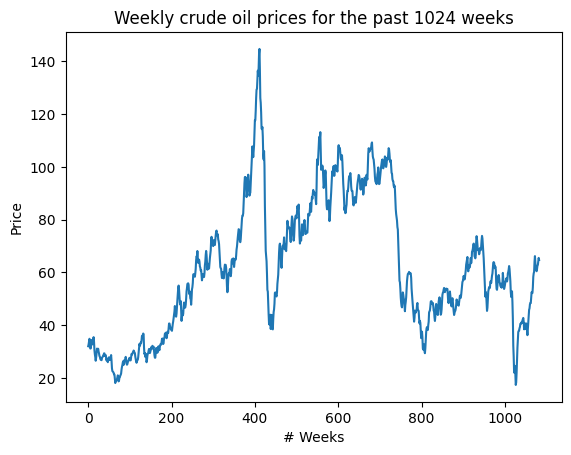

In [6]:
import csv
from matplotlib import pyplot as plt
import requests
url='https://home.cs.colorado.edu/~srirams/courses/coursera-ds-alg-2021/crude_oil_prices_weekly.csv'
r = requests.get(url, allow_redirects=True)
open('crude_oil_prices_weekly.csv', 'wb').write(r.content)
with open("crude_oil_prices_weekly.csv", "r") as csvfile:
    weekly_prices = []
    csvreader = csv.DictReader(csvfile)
    count = 0
    tot_price = 0
    for row in csvreader:
        # print(row["Date"], row["Open"], row["Close"])
        #if row["Close"] != 'null' and row["Close"] != "":
            #print(row["Close"])
        tot_price = 0.5 *(float(row["Close"]) + float(row["Open"]))
        weekly_prices.append(tot_price)
    plt.plot(weekly_prices)
    plt.xlabel('# Weeks')
    plt.ylabel('Price')
    plt.title('Weekly crude oil prices for the past 1024 weeks')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Price')

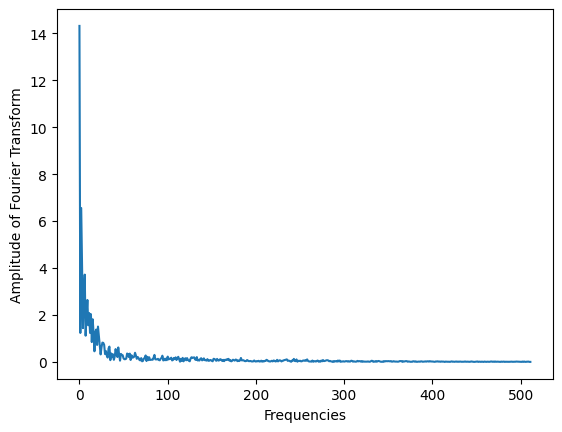

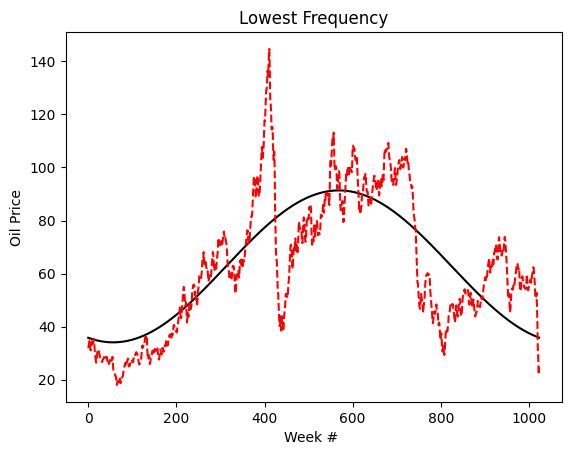

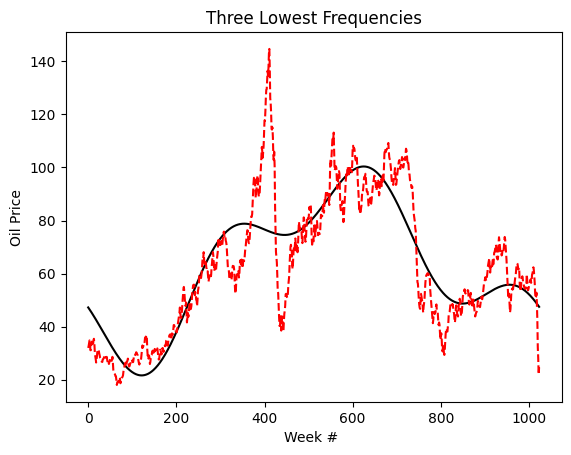

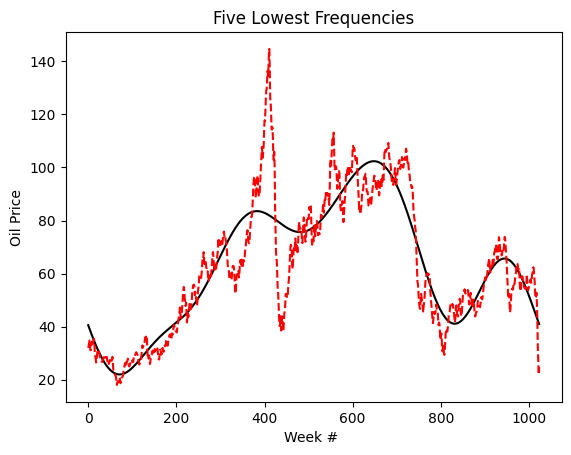

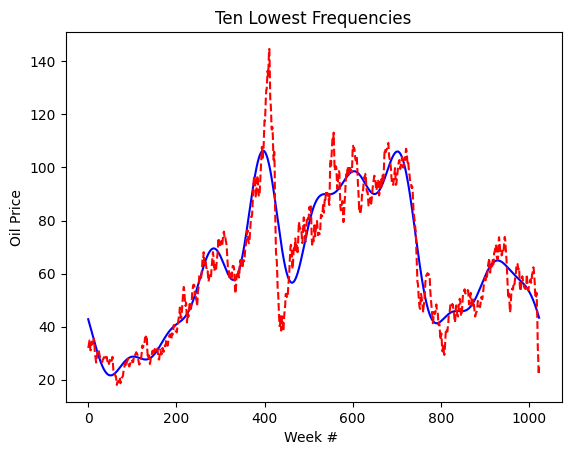

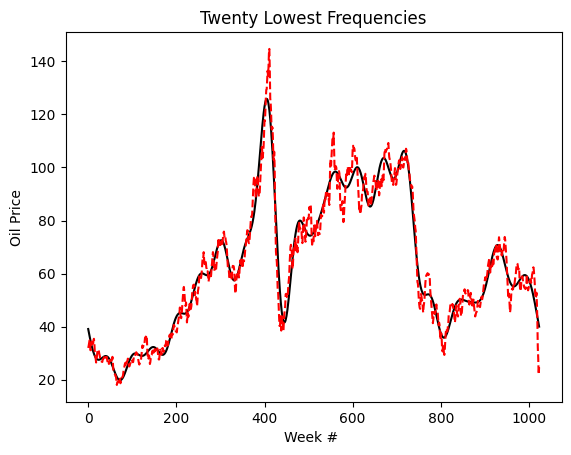

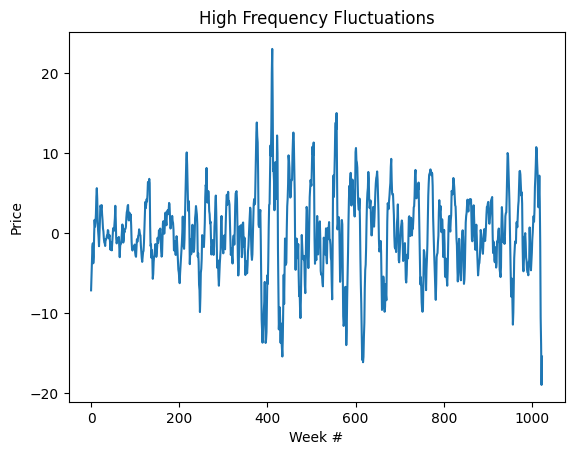

In [7]:
# Let's compute FFT of weekly crude oil prices
fft_seq = fft(weekly_prices[0:1024])
# Plot the FFT frequencies and amplitudes
plt.plot([1/1024*abs(x) for x in fft_seq[1:513]])
plt.xlabel('Frequencies')
plt.ylabel('Amplitude of Fourier Transform')

# Function to select the k lowest frequencies
# from the fft sequence
def select_k_lowest_freq(fft_seq, k):
    n = len(fft_seq)
    assert n % 2 == 0
    assert k < n
    # The new sequence must have
    # the 0th element from orig. seq
    # elements 1--k from orig. seq(inclusive)
    # n - (2k + 1) 0s
    # elements n-k to n-1 (inclusive)
    new_seq = [fft_seq[0]] + fft_seq[1:k+1] + [0]*(n - (2*k+1)) + fft_seq[n-k:n]
    return new_seq


fft_lp_filter_1 = select_k_lowest_freq(fft_seq,1)
lp_seq_1 = inverse_fft(fft_lp_filter_1)



fft_lp_filter_3 = select_k_lowest_freq(fft_seq,3)
lp_seq_3 = inverse_fft(fft_lp_filter_3)


fft_lp_filter_5 = select_k_lowest_freq(fft_seq,5)
lp_seq_5 = inverse_fft(fft_lp_filter_5)

fft_lp_filter_10 = select_k_lowest_freq(fft_seq,10)
lp_seq_10 = inverse_fft(fft_lp_filter_10)

fft_lp_filter_20 = select_k_lowest_freq(fft_seq,20)
lp_seq_20 = inverse_fft(fft_lp_filter_20)

fft_lp_filter_40 = select_k_lowest_freq(fft_seq,40)
lp_seq_40 = inverse_fft(fft_lp_filter_40)

plt.figure()
plt.plot(lp_seq_1,'-k')
plt.plot(weekly_prices[0:1024],'--r')
plt.title('Lowest Frequency')
plt.xlabel('Week # ')
plt.ylabel('Oil Price')



plt.figure()
plt.plot(lp_seq_3,'-k')
plt.plot(weekly_prices[0:1024],'--r')
plt.title('Three Lowest Frequencies')
plt.xlabel('Week # ')
plt.ylabel('Oil Price')


plt.figure()
plt.plot(lp_seq_5,'-k')
plt.plot(weekly_prices[0:1024],'--r')
plt.title('Five Lowest Frequencies')
plt.xlabel('Week # ')
plt.ylabel('Oil Price')


plt.figure()
plt.plot(lp_seq_10,'-b')
plt.plot(weekly_prices[0:1024],'--r')
plt.title('Ten Lowest Frequencies')
plt.xlabel('Week # ')
plt.ylabel('Oil Price')


plt.figure()
plt.plot(lp_seq_20,'-k')
plt.plot(weekly_prices[0:1024],'--r')
plt.title('Twenty Lowest Frequencies')
plt.xlabel('Week # ')
plt.ylabel('Oil Price')

# If we subtract the low frequency components from the overall
# prices, we can extract the high frequency fluctuations
plt.figure()
plt.plot([a-b for (a,b) in zip(weekly_prices[0:1024],lp_seq_20)])
plt.title('High Frequency Fluctuations')
plt.xlabel('Week #')
plt.ylabel('Price')

## Signal Processing with FFT

Let us read a sound file: bach air from suite 3 involving a violin (high frequency) and a bass (lower frequency).

In [8]:
import IPython.display as ipd
import requests
url='https://home.cs.colorado.edu/~srirams/courses/coursera-ds-alg-2021/Bach_Air_from_Suite_3.wav'
r = requests.get(url, allow_redirects=True)
open('Bach_Air_from_Suite_3.wav', 'wb').write(r.content)
ipd.Audio('Bach_Air_from_Suite_3.wav') # load a local WAV file

Output hidden; open in https://colab.research.google.com to view.

(643072, 2)


Text(0.5, 1.0, 'Channel 0')

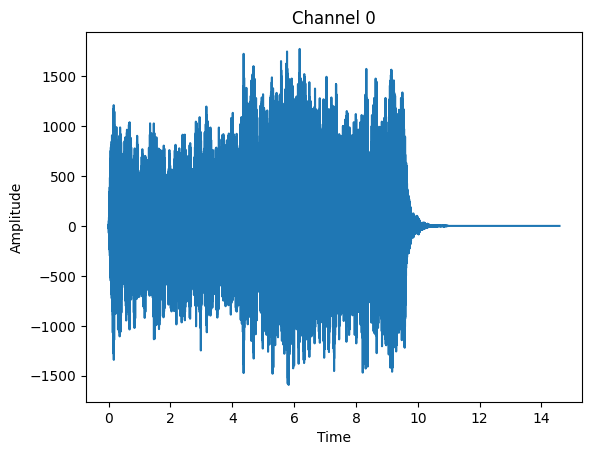

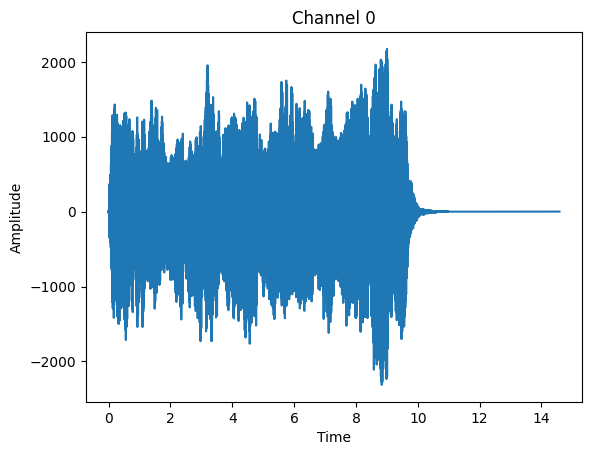

In [ ]:
from scipy.io.wavfile import read, write
# We can load the wav file as a sequence of amplitudes over time.
(rate,sound_data)= read('Bach_Air_from_Suite_3.wav')
print(sound_data.shape)
plt.plot([j/rate for j in range(sound_data.shape[0])], sound_data[:,0])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Channel 0')
plt.figure()
plt.plot([j/rate for j in range(sound_data.shape[0])], sound_data[:,1])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Channel 0')

Let us run fft on the sound signa. We will use the inbuilt fft function in the numpy library.

Text(0, 0.5, 'Amplitude/Energy')

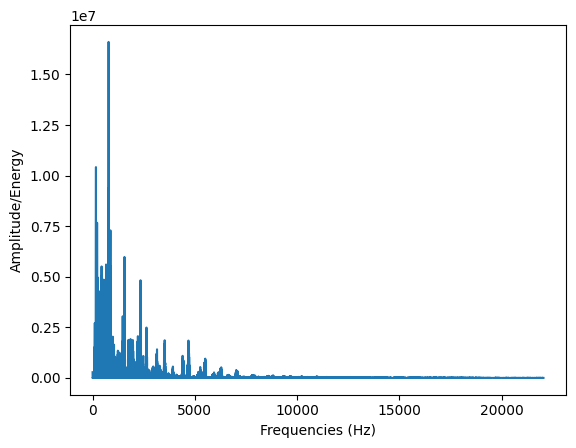

In [ ]:

from numpy.fft import fft, ifft,fftfreq
from numpy import linspace
N = len(sound_data)
sound_fft = fft(sound_data[:,0])
frequencies = fftfreq(N, 1/rate)
plt.plot(frequencies[:N//2], [abs(x) for x in sound_fft[:N//2]])
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude/Energy')

Let us focus on the frequencies from 0 to 200Hz and get rid of all the other frequencies by zeroing them out.

In [ ]:
from numpy import int16
def select_freq_range(lo, hi, frequencies, fft_spectrum):
    assert len(frequencies) == len(fft_spectrum)
    res = []
    for (f,v) in zip(frequencies, fft_spectrum):
        if f == 0.0: # always keep the 0 hertz component
            res.append(v)
            continue
        if lo <= f <= hi or -hi <= f <= -lo:
            res.append(v)
        else:
            res.append(0.0+0.0j)
    return res

def constitute_wave_file_from_fft(fft_spec, rate, filename):
    ifft_dat = ifft(fft_spec)
    write(filename+'.wav',  rate, ifft_dat.astype(int16))

In [ ]:
upto_200_hz = select_freq_range(0, 200, frequencies, sound_fft)
constitute_wave_file_from_fft(upto_200_hz, rate, 'bach_upto_200hz')
ipd.Audio('bach_upto_200hz.wav') # you will be able to hear the bass if you have your volume turned up high.

<ipython-input-14-b3907d2db679>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  write(filename+'.wav',  rate, ifft_dat.astype(int16))


In [ ]:
upto_1000_hz = select_freq_range(0, 1000, frequencies, sound_fft)
constitute_wave_file_from_fft(upto_1000_hz, rate, 'bach_upto_1000hz')
ipd.Audio('bach_upto_1000hz.wav') # you will clearly hear the bass and lower frquencies of the violin.

<ipython-input-14-b3907d2db679>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  write(filename+'.wav',  rate, ifft_dat.astype(int16))


In [ ]:
between_1000_and_3000_hz = select_freq_range(1000, 3000, frequencies, sound_fft)
constitute_wave_file_from_fft(between_1000_and_3000_hz, rate, 'bach_1000_to_3000hz')
ipd.Audio('bach_1000_to_3000hz.wav') # You will hear the violin

<ipython-input-14-b3907d2db679>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  write(filename+'.wav',  rate, ifft_dat.astype(int16))


In [ ]:
beyond_3000_hz = select_freq_range(3000, 15000, frequencies, sound_fft)
constitute_wave_file_from_fft(beyond_3000_hz, rate, 'bach_3000hz+')
ipd.Audio('bach_3000hz+.wav') # The more "cat scratch" frequencies of the violin will be heard.

<ipython-input-14-b3907d2db679>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  write(filename+'.wav',  rate, ifft_dat.astype(int16))
